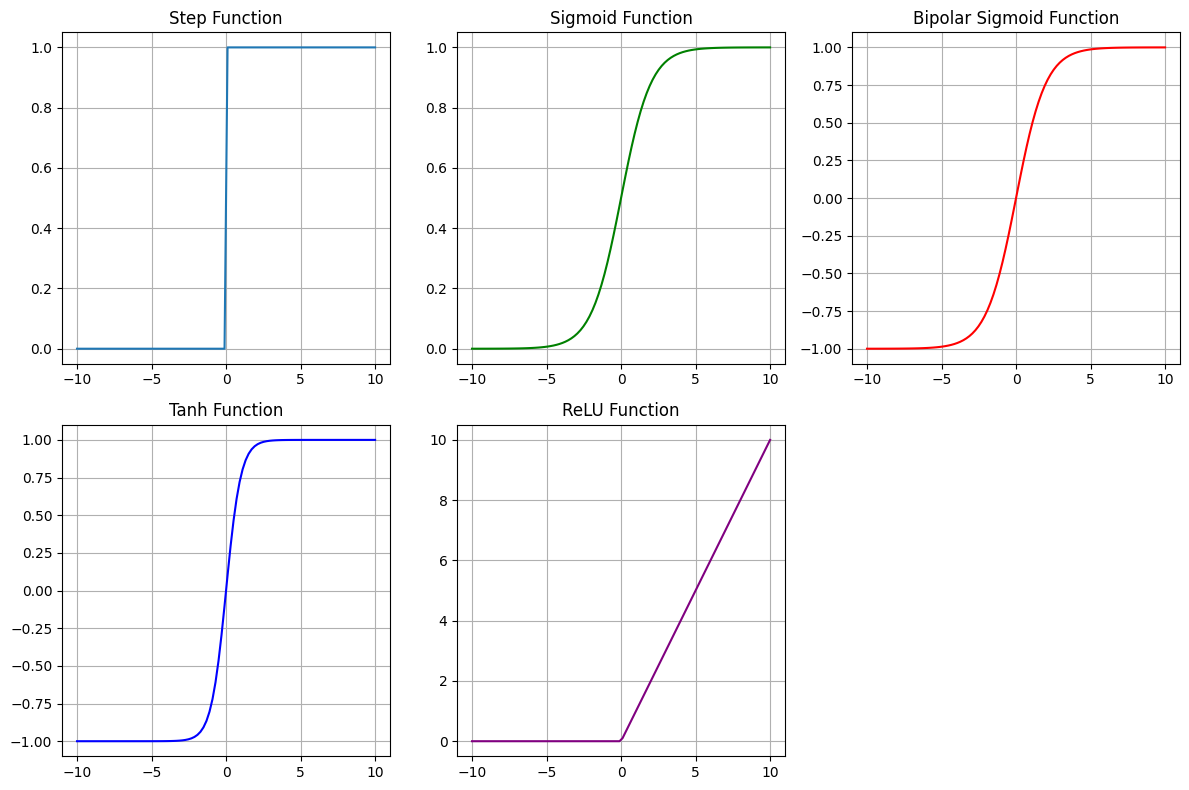

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf


# Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Sigmoid Function
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# Bipolar Sigmoid Function
def bipolar_sigmoid_function(x):
    return (2 / (1 + np.exp(-x))) - 1

# Tanh Function
def tanh_function(x):
    return np.tanh(x)

# ReLU Function
def relu_function(x):
    return np.maximum(0, x)

# Visualization
x = np.linspace(-10, 10, 100)

# Plotting all functions
plt.figure(figsize=(12, 8))

# Step Function Plot
plt.subplot(2, 3, 1)
plt.plot(x, step_function(x), label="Step Function")
plt.title("Step Function")
plt.grid(True)

# Sigmoid Function Plot
plt.subplot(2, 3, 2)
plt.plot(x, sigmoid_function(x), label="Sigmoid Function", color="g")
plt.title("Sigmoid Function")
plt.grid(True)

# Bipolar Sigmoid Function Plot
plt.subplot(2, 3, 3)
plt.plot(x, bipolar_sigmoid_function(x), label="Bipolar Sigmoid", color="r")
plt.title("Bipolar Sigmoid Function")
plt.grid(True)

# Tanh Function Plot
plt.subplot(2, 3, 4)
plt.plot(x, tanh_function(x), label="Tanh Function", color="b")
plt.title("Tanh Function")
plt.grid(True)

# ReLU Function Plot
plt.subplot(2, 3, 5)
plt.plot(x, relu_function(x), label="ReLU Function", color="purple")
plt.title("ReLU Function")
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()


### XOR DATA

In [15]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# Define a simple neural network function

def create_model(activation_function):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, input_dim=2, activation=activation_function),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
# Train and evaluate the network with different activation functions

activations = ['sigmoid', 'tanh', 'relu']
results = {}
history_data = {}

for activation in activations:
    print(f"\nTraining with {activation} activation function")

    model = create_model(activation)

    history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

    y_pred_train = (model.predict(X_train) > 0.5).astype(int)
    y_pred_test = (model.predict(X_test) > 0.5).astype(int)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    results[activation] = {
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    }
    history_data[activation] = history


Training with sigmoid activation function


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Training with tanh activation function


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Training with relu activation function


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


### OUTPUT

In [19]:
for activation, metrics in results.items():
    print(f"\nActivation Function: {activation}")
    print(f"Train Accuracy: {metrics['Train Accuracy']}")
    print(f"Test Accuracy: {metrics['Test Accuracy']}")


Activation Function: sigmoid
Train Accuracy: 0.6666666666666666
Test Accuracy: 0.0

Activation Function: tanh
Train Accuracy: 0.6666666666666666
Test Accuracy: 1.0

Activation Function: relu
Train Accuracy: 0.6666666666666666
Test Accuracy: 0.0


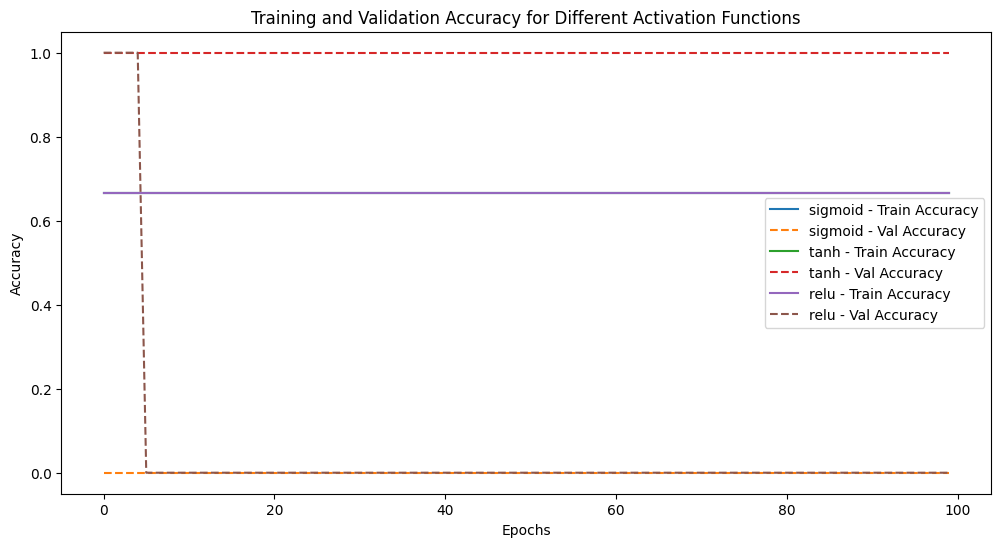

In [20]:
# Plot training and validation accuracy for each activation function

plt.figure(figsize=(12, 6))

for activation in activations:
    plt.plot(history_data[activation].history['accuracy'], label=f'{activation} - Train Accuracy')
    plt.plot(history_data[activation].history['val_accuracy'], linestyle='--', label=f'{activation} - Val Accuracy')

plt.title('Training and Validation Accuracy for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

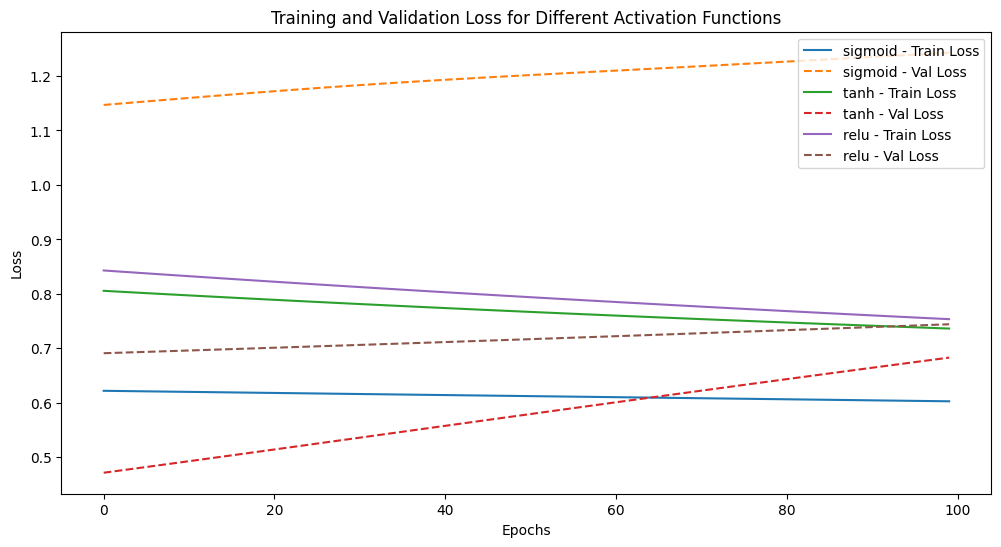

In [21]:
# Plot training and validation loss for each activation function

plt.figure(figsize=(12, 6))

for activation in activations:
    plt.plot(history_data[activation].history['loss'], label=f'{activation} - Train Loss')
    plt.plot(history_data[activation].history['val_loss'], linestyle='--', label=f'{activation} - Val Loss')

plt.title('Training and Validation Loss for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()